<font color = "FB28ED"><h1>Online Retail Store</h1></font>

<font color = "orange"><h2>Problem Statement</h2></font>

<font color = "#ff8080"><h2>An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same.</h2></font>

Dataset Information:
The online_retail.csv contains 387961 rows and 8 columns.

Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
retail = pd.read_csv('OnlineRetail (3).csv', encoding='latin1')

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
retail['Sales'] = retail['Quantity']*retail['UnitPrice']

In [6]:
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.3


In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Sales        541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [8]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Sales               0
dtype: int64

In [9]:
(retail.isnull().sum()/retail.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
Sales           0.000000
dtype: float64

In [10]:
retail.duplicated().sum()

5268

In [11]:
retail.shape

(541909, 9)

In [12]:
# Impute missing values for 'Description' with 'Unknown'
retail['Description'].fillna('Unknown', inplace=True)

# Impute missing values for 'CustomerID' with a placeholder value (e.g., -1)
retail['CustomerID'].fillna(-1, inplace=True)

In [13]:
retail.drop_duplicates(inplace = True)
retail.duplicated().sum()

0

In [14]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['CustomerID'] = retail['CustomerID'].astype(dtype=str)

In [15]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,Sales
count,536641.000000,536641,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,18.123861
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-168469.600000
25%,1.000000,2011-03-28 10:52:00,1.250000,3.750000
50%,3.000000,2011-07-19 14:04:00,2.080000,9.870000
75%,10.000000,2011-10-18 17:05:00,4.130000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,219.130156,NaN,97.233118,380.656263


<font color = "#ff6600"><h2>Checking the correlation between Columns</h2></font>

In [16]:
numeric_columns = retail.select_dtypes(include=['number']).columns
correlation_matrix = retail[numeric_columns].corr()
print(correlation_matrix)


           Quantity  UnitPrice     Sales
Quantity   1.000000  -0.001241  0.886712
UnitPrice -0.001241   1.000000 -0.162043
Sales      0.886712  -0.162043  1.000000


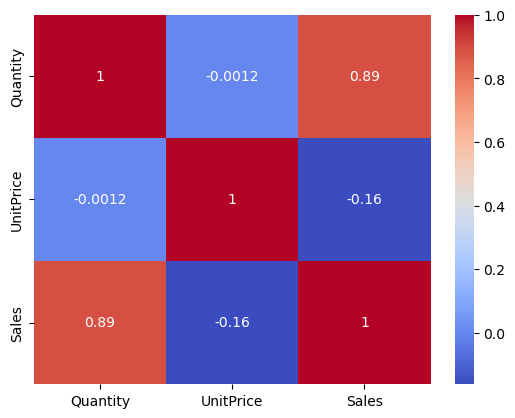

In [17]:
sns.heatmap(data = correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<font color = "#ff6600"><h2>Checking for outliers</h2></font>

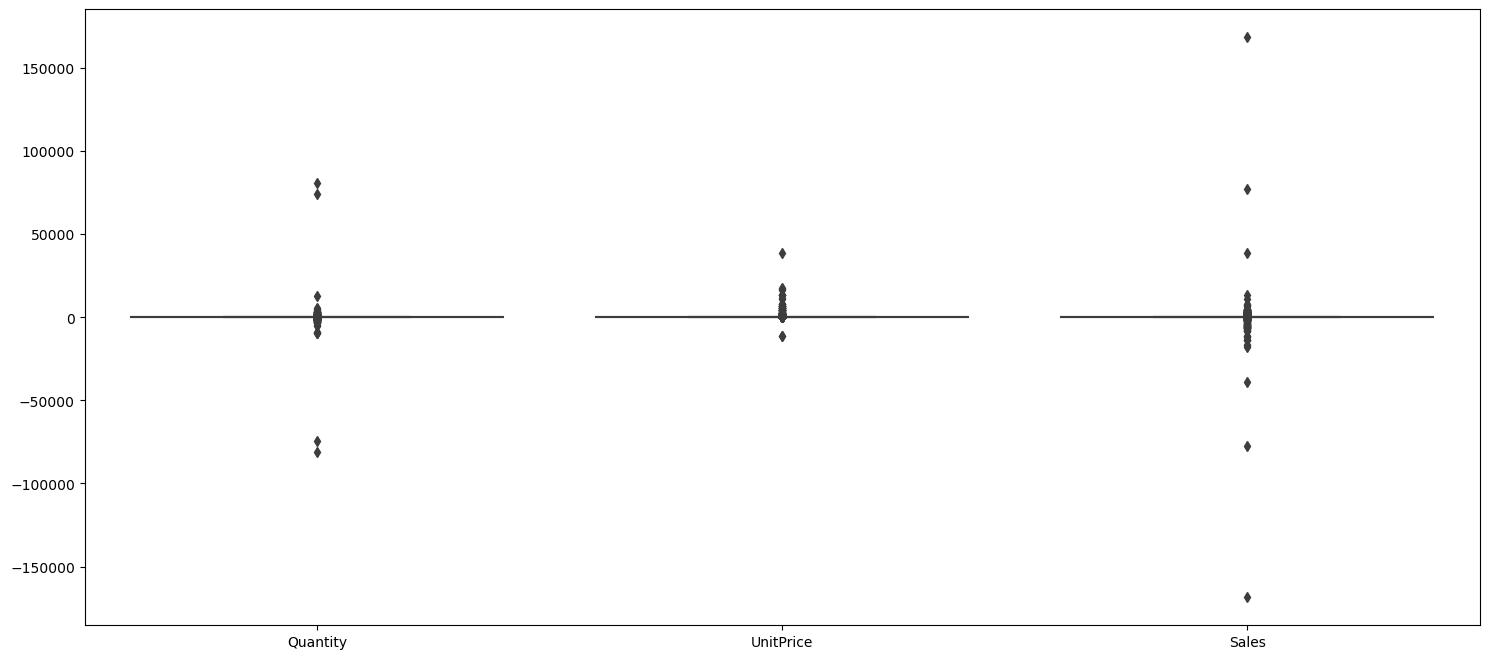

In [18]:
plt.figure(figsize=(18,8))
colours = sns.color_palette(n_colors=8)
sns.boxplot(data = retail,palette=colours)
plt.show() 

In [19]:
outliers_columns = ['Quantity','UnitPrice','Sales']

In [20]:
for col in outliers_columns:
    Q1 = retail[col].quantile(0.25)
    Q3 = retail[col].quantile(0.75)
    IQR = Q3-Q1
    
    retail = retail[(retail[col] >= Q1 - 1.5 * IQR) & (retail[col] <= Q3 + 1.5 * IQR)]

<font color = "#ff6600"><h2>Insights from the data</h2></font>
<font color = "#ff8080"><h2>Popular Products(Top- Selling Products)</h2></font>

In [21]:
popular_products = retail.groupby('Description')['Sales'].sum().reset_index()
Top_selling_products = popular_products.sort_values(by = 'Sales',ascending=False).head(10)
Top_selling_products

,Description,Sales
1717,JUMBO BAG RED RETROSPOT,22153.05
3639,WHITE HANGING HEART T-LIGHT HOLDER,20646.86
207,ASSORTED COLOUR BIRD ORNAMENT,18433.83
1883,LUNCH BAG RED RETROSPOT,17742.21
1684,JAM MAKING SET WITH JARS,15824.04
2270,PARTY BUNTING,15395.62
2962,SET OF 3 CAKE TINS PANTRY DESIGN,15049.67
3280,SPOTTY BUNTING,14134.65
1875,LUNCH BAG BLACK SKULL.,13557.06
2065,NATURAL SLATE HEART CHALKBOARD,13416.94


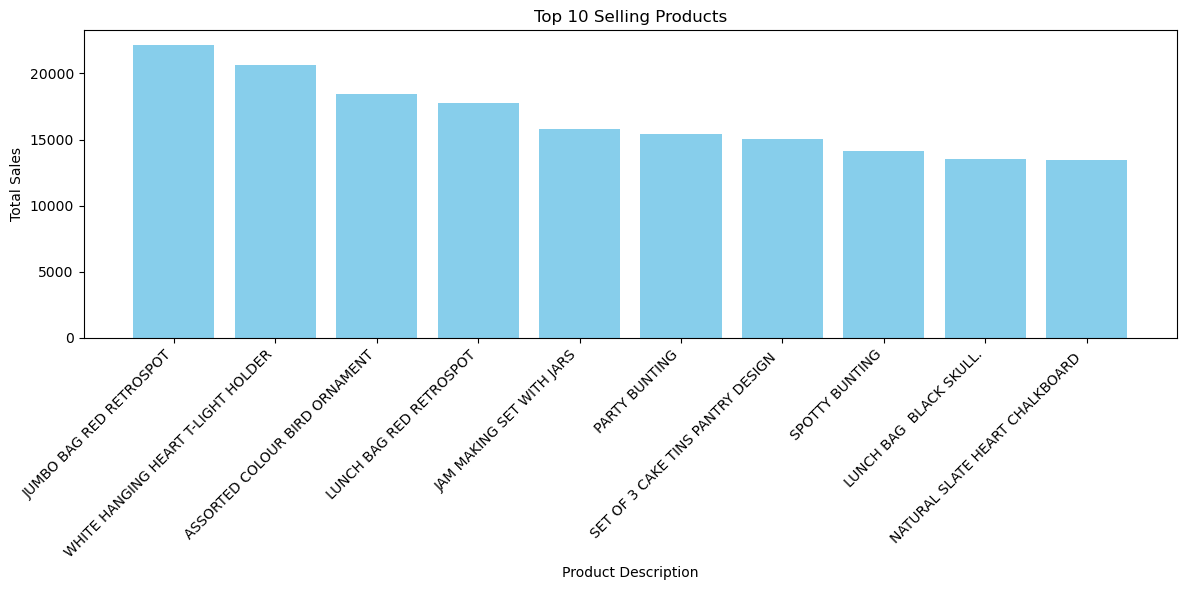

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(Top_selling_products['Description'], Top_selling_products['Sales'], color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Total Sales')
plt.title('Top 10 Selling Products')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

<font color = "orange"><h4>The products in the graph are the TOP 10 Selling products</h4></font>

<font color = "#ff8080"><h2>Customer Demographs</h2></font>

In [23]:
region_of_purchase = retail["Country"].unique()
region_of_purchase                                 

array(['United Kingdom', 'France', 'Australia', 'Germany', 'Norway',
       'EIRE', 'Switzerland', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Spain', 'Cyprus', 'Austria', 'Sweden', 'Netherlands', 'Israel',
       'Finland', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [24]:
purchase_countries = retail["Country"].value_counts()
purchase_countries

Country
United Kingdom          397080
Germany                   6539
France                    6088
EIRE                      5258
Spain                     1869
Belgium                   1519
Switzerland               1255
Portugal                  1147
Italy                      581
Norway                     575
Channel Islands            500
Australia                  463
Cyprus                     463
Finland                    417
Netherlands                415
Unspecified                363
Austria                    301
Poland                     245
Sweden                     180
Israel                     170
USA                        157
Denmark                    156
Hong Kong                  145
Iceland                    124
Canada                     104
Japan                      104
Greece                     103
Malta                       95
Singapore                   76
RSA                         51
United Arab Emirates        44
European Community          41


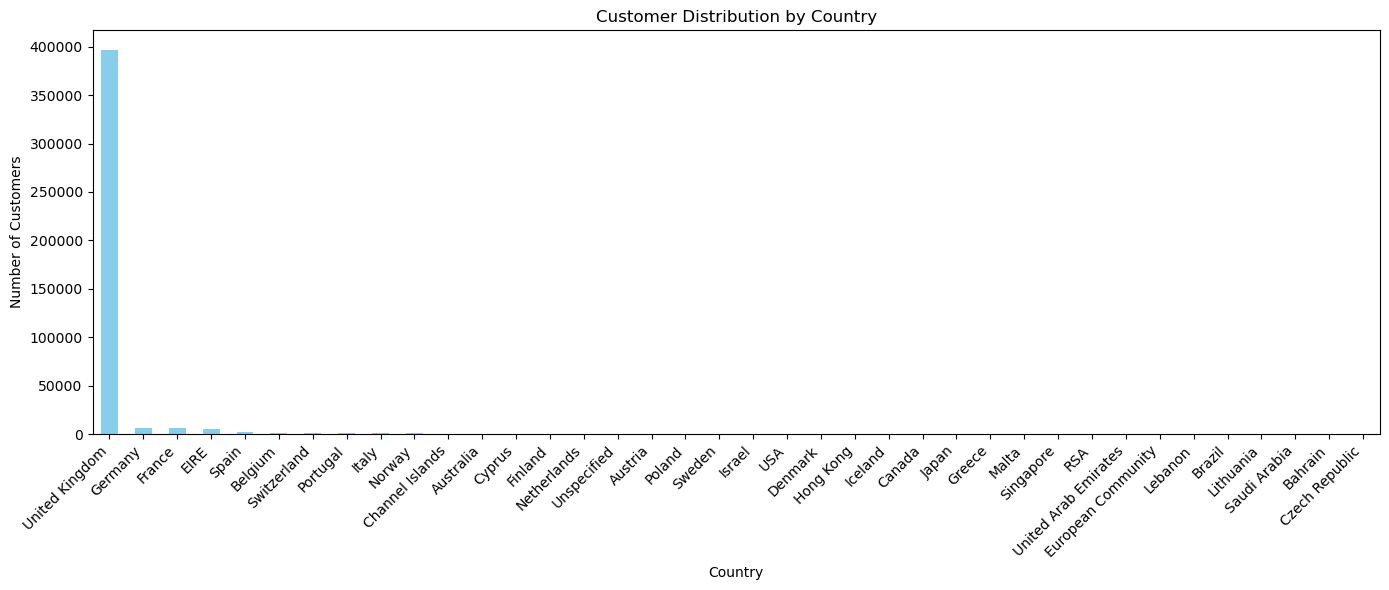

In [25]:
# Plot the distribution of customers by country
plt.figure(figsize=(14, 6))
purchase_countries.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Country')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


<font color = "orange"><h4>From the above graph United Kingdom is the region where most customers purchase the products</h4></font>

<font color = "#ff8080"><h2>Frequency of purchase for each customers</h2></font>

In [26]:
purchase_frequency = retail.groupby('CustomerID')['InvoiceNo'].nunique()
print("Frequency of purchase for each customers :")
purchase_frequency.sort_values(ascending = False).head(20)

Frequency of purchase for each customers :


CustomerID
-1.0       2341
14911.0     223
12748.0     198
17841.0     165
14606.0     125
15311.0     111
13089.0      80
12971.0      58
14527.0      55
17811.0      50
12921.0      49
15039.0      48
13767.0      46
13534.0      43
13408.0      43
17315.0      41
13078.0      41
12471.0      40
13468.0      39
17511.0      39
Name: InvoiceNo, dtype: int64

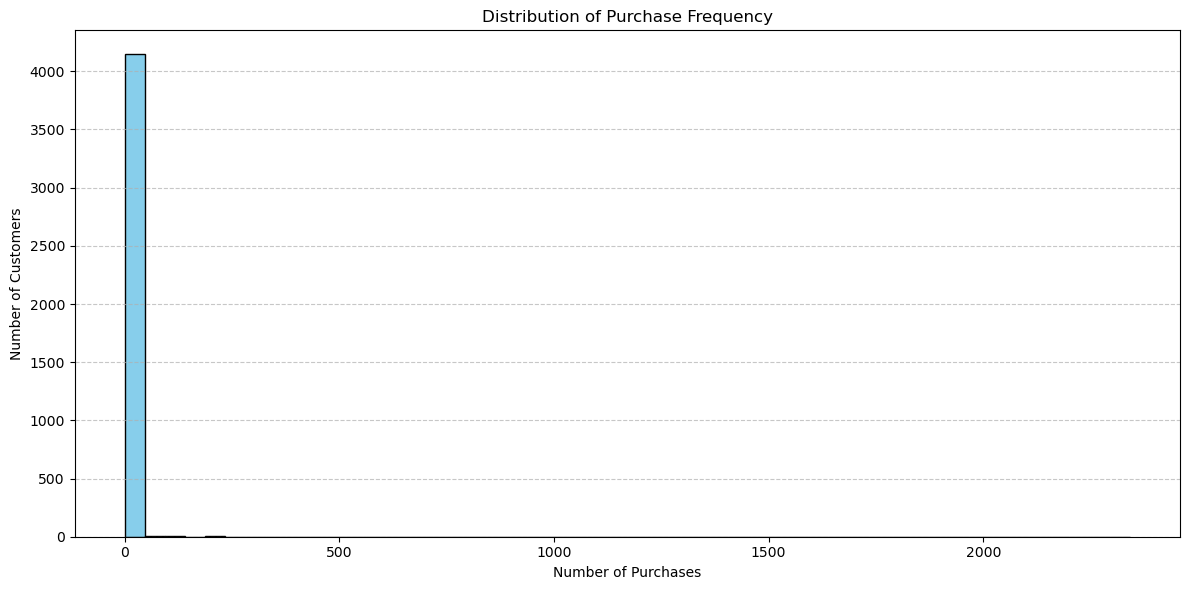

In [27]:
# Plot the distribution of purchase frequency
plt.figure(figsize=(12, 6))
purchase_frequency.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Distribution of Purchase Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

<font color = "#ff8080"><h2>Transactions with negative sales</h2></font>

In [28]:
negative_sales = retail[retail['Sales'] < 0]
print("Transactions with Negative Sales:")
print(negative_sales)

Transactions with Negative Sales:
       InvoiceNo StockCode                       Description  Quantity  \
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
1441     C536543     22632         HAND WARMER RED RETROSPOT        -1   
1442     C536543     22355         CHARLOTTE BAG SUKI DESIGN        -2   
1973     C536548     22244        3 HOOK HANGER MAGIC GARDEN        -4   
1974     C536548     22242     5 HOOK HANGER MAGIC TOADSTOOL        -5   
...          ...       ...                               ...       ...   
540142   C581468     22098         BOUDOIR SQUARE TISSUE BOX       -12   
540176   C581470     23084                RABBIT NIGHT LIGHT        -4   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  Sales  
154

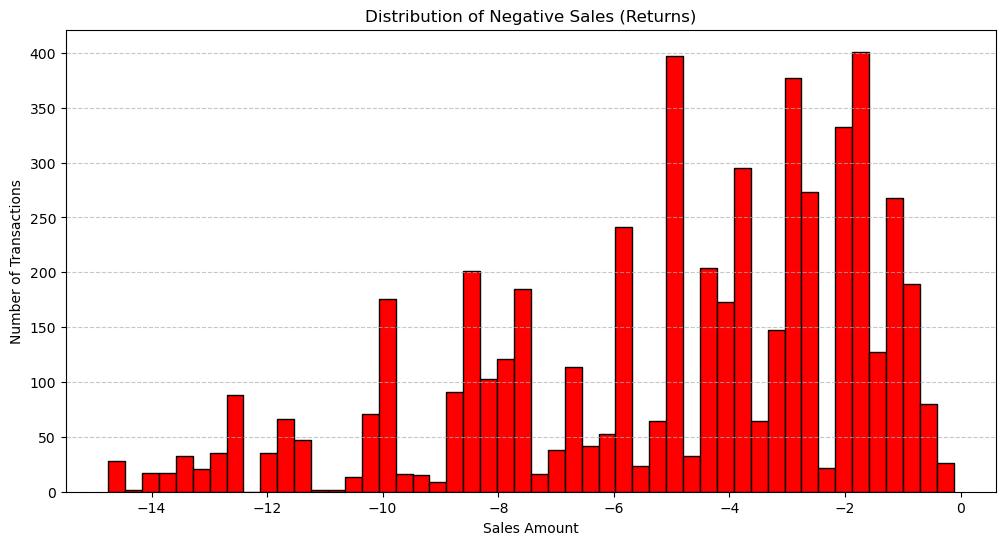

In [29]:
plt.figure(figsize=(12, 6))
plt.hist(negative_sales['Sales'], bins=50, color='red', edgecolor='black')
plt.xlabel('Sales Amount')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Negative Sales (Returns)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<font color = "#ff8080"><h2>Average Transaction Value</h2></font>

In [30]:
average_transaction = retail.groupby('InvoiceNo')['Sales'].mean()
print('Average transaction value')
average_transaction

Average transaction value


InvoiceNo
536365     19.874286
536366     11.100000
536367     20.475000
536368     17.512500
536369     17.850000
             ...    
C581466    -5.300000
C581468    -4.680000
C581470    -8.320000
C581490    -9.130000
C581569    -3.750000
Name: Sales, Length: 20747, dtype: float64

<font color = "#ff8080"><h2>Inactive customers</h2></font>

In [31]:
last_purchase_date = retail.groupby('CustomerID')['InvoiceDate'].max()
current_date = datetime.now()

# Calculate the time difference between the last purchase date and the current date
inactive_period = current_date - last_purchase_date

# Define a threshold for inactivity (e.g., 6 months)
inactive_threshold = pd.Timedelta(days=180)
inactive_customers = last_purchase_date[inactive_period > inactive_threshold]

print("Inactive Customers:")
print(inactive_customers)


Inactive Customers:
CustomerID
-1.0      2011-12-09 10:26:00
12347.0   2011-12-07 15:52:00
12348.0   2011-04-05 10:47:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
                  ...        
18280.0   2011-03-07 09:52:00
18281.0   2011-06-12 10:53:00
18282.0   2011-12-02 11:43:00
18283.0   2011-12-06 12:02:00
18287.0   2011-10-12 10:23:00
Name: InvoiceDate, Length: 4157, dtype: datetime64[ns]


<font color = "#ff8080"><h2>One-Time buyers</h2></font>

In [32]:
customer_purchase = retail.groupby('CustomerID')['InvoiceNo'].nunique()
print('One-Time Buyers')
customer_purchase[customer_purchase == 1]

One-Time Buyers


CustomerID
12348.0    1
12349.0    1
12350.0    1
12353.0    1
12354.0    1
          ..
18269.0    1
18277.0    1
18278.0    1
18280.0    1
18281.0    1
Name: InvoiceNo, Length: 1384, dtype: int64

<font color = "#ff8080"><h2>Frequent Shoppers</h2></font>

In [33]:
customer_frequent_shoppers = retail.groupby('CustomerID')['InvoiceNo'].nunique()
print('Frequent Shoppers')
frequent_shoppers = customer_purchase[customer_purchase > 1]
print(frequent_shoppers.sort_values(ascending=False))

Frequent Shoppers
CustomerID
-1.0       2341
14911.0     223
12748.0     198
17841.0     165
14606.0     125
           ... 
16149.0       2
13311.0       2
16160.0       2
16174.0       2
18287.0       2
Name: InvoiceNo, Length: 2773, dtype: int64


<font color = "#ff8080"><h2>Yearly Sales</h2></font>

In [34]:
retail['Year'] = retail['InvoiceDate'].dt.year
yearly_sales = retail.groupby('Year')['Sales'].sum()
yearly_sales.sort_values(ascending=False)
print("Yearly Sales:")
print(yearly_sales)

Yearly Sales:
Year
2010     283070.270
2011    3602454.254
Name: Sales, dtype: float64


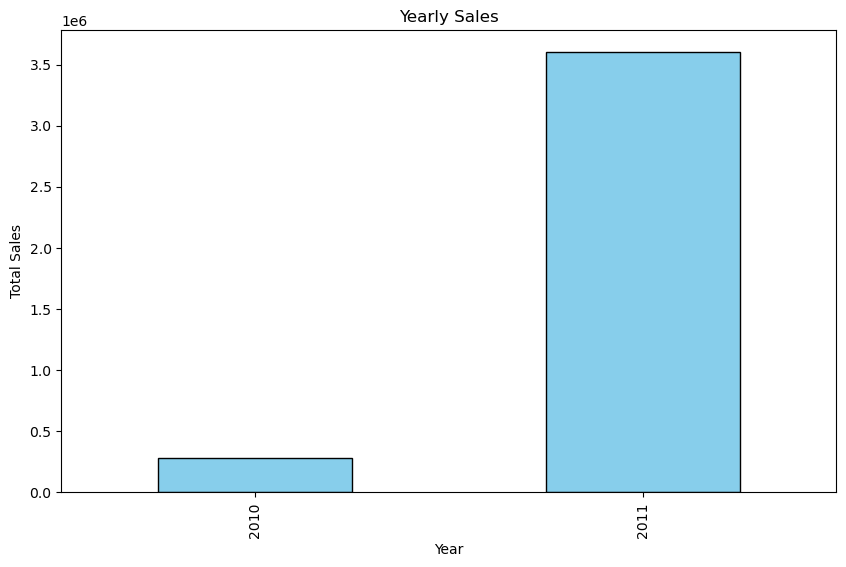

In [35]:
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales')
plt.show()

<font color = "#ff4dff"><h4>2011 has the high sales compared to 2010</h4></font>

<font color = "orange"><h2>Applying K-Means Clusters</h2></font>

In [36]:
# Select relevant columns for clustering
X = retail[['Quantity', 'UnitPrice', 'Sales']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

  File "F:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "F:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "F:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


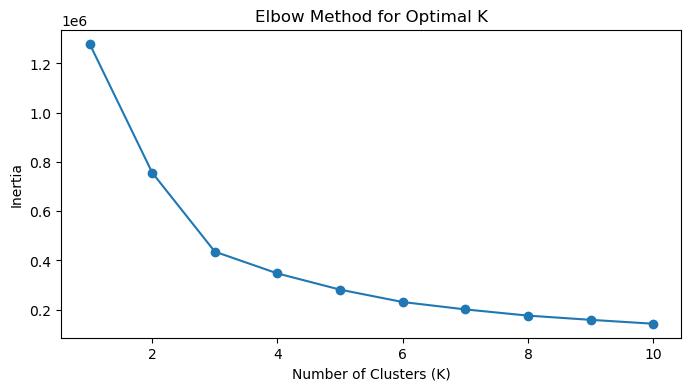

In [38]:
# Plot the elbow method to determine the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [39]:
# Based on the elbow method, choose the optimal number of clusters
optimal_k = 4

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=45)
retail['Cluster'] = kmeans.fit_predict(X_scaled)

In [40]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,3


In [41]:
cluster_count = retail['Cluster'].value_counts()
cluster_count

Cluster
1    209953
2     92620
3     65431
0     58699
Name: count, dtype: int64

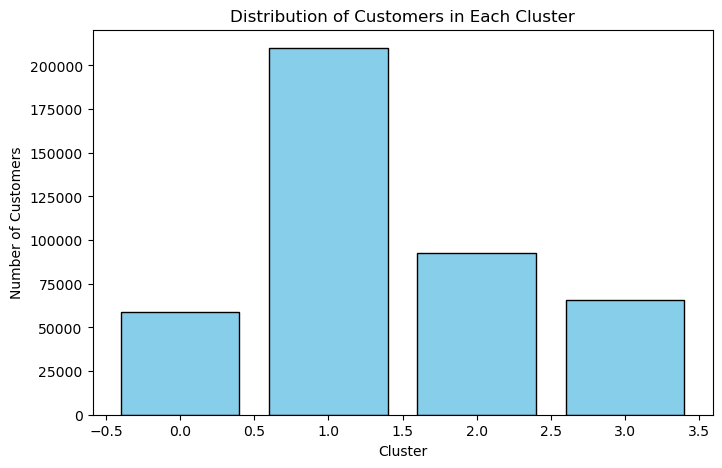

In [42]:
# Plot the histogram
plt.figure(figsize=(8, 5))
plt.bar(cluster_count.index, cluster_count.values, color='skyblue', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers in Each Cluster')
plt.show()